In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
metadata = pd.read_csv("movies_metadata.csv")

In [4]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
metadata.shape

(45466, 24)

In [7]:
metadata.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [8]:
#convert id to int
#some of entries in id are datetime format (YYYY-MM-DD), which has lenght of 10

metadata = metadata[metadata.id.map(lambda x: len(x) != 10)]

In [9]:
metadata.shape

(45463, 24)

In [10]:
metadata.id.dtype

dtype('O')

In [11]:
metadata.id = pd.to_numeric(metadata.id) 

In [12]:
metadata.id.dtype

dtype('int64')

In [13]:
metadata['release_date'] = pd.to_datetime(metadata.release_date, errors='coerce').dt.year

In [14]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995.0,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995.0,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


<AxesSubplot:>

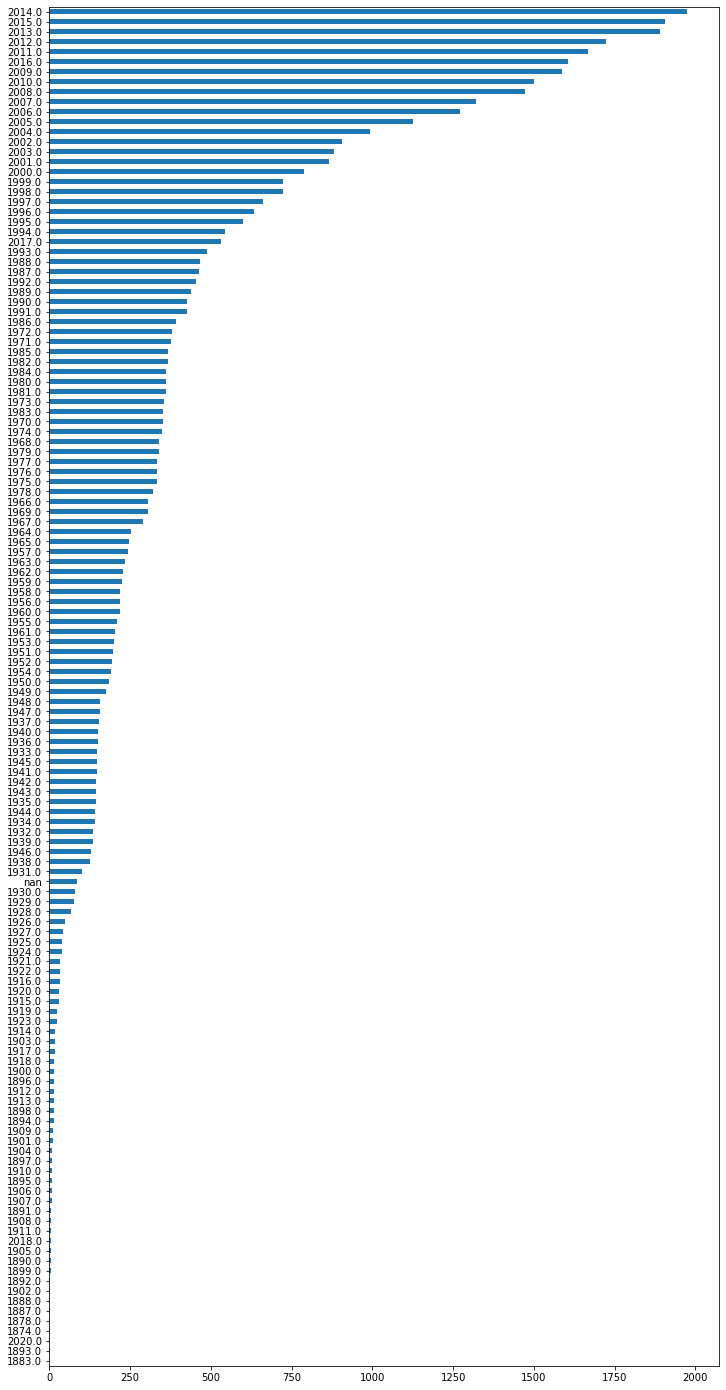

In [15]:
metadata.release_date.value_counts(dropna=False).sort_values().plot(kind='barh',figsize=(12,25))

In [16]:
metadata.release_date.max()

2020.0

In [17]:
metadata.release_date.min()

1874.0

In [19]:
metadata = metadata[metadata['release_date'] > 1989]

### we have to collect 2018 - 22 year movies dataset

In [20]:
metadata.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
20197,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",NaN,115276,tt1921070,en,Pusher,"In London, a drug dealer grows increasingly de...",...,2012.0,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Never cross the line.,Pusher,False,5.3,38.0


In [21]:
new_metadata = metadata.loc[:,['id','title','tagline','genres','overview','popularity']]

In [22]:
new_metadata.head()

,id,title,tagline,genres,overview,popularity
0,862,Toy Story,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",21.946943
1,8844,Jumanji,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,17.015539
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,11.7129
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",3.859495
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,8.387519


In [23]:
def get_genres(x):
    genres_list = []
    if len(x):
        genres_str = ' '
        for i in range(len(x)):
            genres_list.append(x[i]['name'])
        return genres_str.join(genres_list)
    else:
        return np.NaN

In [24]:
import ast
new_metadata['genres'] = new_metadata['genres'].map(lambda x: ast.literal_eval(x))


new_metadata['movie_genres'] = new_metadata['genres'].apply(get_genres)

In [25]:
new_metadata.drop(['genres'],axis=1,inplace=True)

In [26]:
new_metadata['title'] = new_metadata['title'].str.lower()

In [27]:
new_metadata = new_metadata.rename(columns={'title':'movie_title'})

In [28]:
new_metadata.head()

,id,movie_title,tagline,overview,popularity,movie_genres
0,862,toy story,NaN,"Led by Woody, Andy's toys live happily in his ...",21.946943,Animation Comedy Family
1,8844,jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,17.015539,Adventure Fantasy Family
2,15602,grumpier old men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,11.7129,Romance Comedy
3,31357,waiting to exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...",3.859495,Comedy Drama Romance
4,11862,father of the bride part ii,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,8.387519,Comedy


In [29]:
new_metadata.isna().sum()

id                  0
movie_title         0
tagline         16877
overview          659
popularity          0
movie_genres     1524
dtype: int64

In [30]:
new_metadata.to_csv("new_metadata.csv", index=False)

In [31]:
new_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29684 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            29684 non-null  int64 
 1   movie_title   29684 non-null  object
 2   tagline       12807 non-null  object
 3   overview      29025 non-null  object
 4   popularity    29684 non-null  object
 5   movie_genres  28160 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB
